In [2]:
# @title
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. 결측값(Missing value)
# 2. 결측값 대체(Missing value Imputation)


## 2.1. 제거법

In [8]:
# @title
import pandas as pd
import numpy as np

# 예제 데이터프레임 생성
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [5, np.nan, np.nan, 8, 10]}
df = pd.DataFrame(data)
df

,A,B
0,1.0,5.0
1,2.0,NaN
2,NaN,NaN
3,4.0,8.0
4,5.0,10.0


In [9]:
# @title
df.dropna()

,A,B
0,1.0,5.0
3,4.0,8.0
4,5.0,10.0


## 2.2. 평균대치법

In [10]:
# @title
# 결측값을 평균값으로 대체
df['A'].fillna(df['A'].mean(), inplace=True)
df['B'].fillna(df['B'].mean(), inplace=True)
df

,A,B
0,1.0,5.000000
1,2.0,7.666667
2,3.0,7.666667
3,4.0,8.000000
4,5.0,10.000000


## 2.3. 단순확률 대치법

In [12]:
# @title
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [5, np.nan, np.nan, 8, 10]}
df = pd.DataFrame(data)

# 결측값을 단순확률로 대체하는 함수 정의
def random_imputation(series):
    missing = series.isnull()
    num_missing = missing.sum()
    if num_missing == 0:
        return series
    imputed_values = series[~missing].sample(num_missing, replace=True).values
    series[missing] = imputed_values
    return series

# 결측값 대체
df['A'] = random_imputation(df['A'])
df['B'] = random_imputation(df['B'])

df

,A,B
0,1.0,5.0
1,2.0,8.0
2,5.0,8.0
3,4.0,8.0
4,5.0,10.0


### 2.3.1. Hot-deck 대체법
Hot-deck 대체법은 결측치를 가진 관측값을 비슷한 다른 관측값으로 대체하는 방법입니다. 여기서는 같은 열의 랜덤한 비결측값을 사용합니다.

In [24]:
# @title
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [5, np.nan, np.nan, 8, 10]}
df = pd.DataFrame(data)

# Hot-deck 대체 함수
def hot_deck_imputation(series):
    missing = series.isnull()
    num_missing = missing.sum()
    if num_missing == 0:
        return series
    imputed_values = series[~missing].sample(num_missing, replace=True).values
    series[missing] = imputed_values
    return series

# 결측값 대체
df['A'] = hot_deck_imputation(df['A'])
df['B'] = hot_deck_imputation(df['B'])
df

,A,B
0,1.0,5.0
1,2.0,5.0
2,1.0,8.0
3,4.0,8.0
4,5.0,10.0


### 2.3.2. Nearest Neighbor 대체법
Nearest Neighbor 대체법은 결측치를 가진 관측값과 가장 가까운 비결측값을 가진 관측값으로 대체하는 방법입니다. 여기서는 KNNImputer를 사용합니다.

In [27]:
# @title
# 예제 데이터프레임 생성
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [5, np.nan, np.nan, 8, 10]}
df = pd.DataFrame(data)
df

,A,B
0,1.0,5.0
1,2.0,NaN
2,NaN,NaN
3,4.0,8.0
4,5.0,10.0


In [33]:
# @title
from sklearn.impute import KNNImputer
# KNNImputer를 사용하여 결측값 대체
imputer = KNNImputer(n_neighbors=2)  # 이웃의 개수는 상황에 맞게 설정
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

imputed_df

,A,B
0,1.0,5.000000
1,2.0,6.500000
2,3.0,7.666667
3,4.0,8.000000
4,5.0,10.000000


In [35]:
# @title
(2+4)/2
(5+8)/2

3.0

6.5

## 2.4. 다중 대치법

In [17]:
# @title
# 예제 데이터프레임 생성
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [5, np.nan, np.nan, 8, 10]}
df = pd.DataFrame(data)
df

,A,B
0,1.0,5.0
1,2.0,NaN
2,NaN,NaN
3,4.0,8.0
4,5.0,10.0


In [19]:
# @title
from statsmodels.imputation.mice import MICEData
# MICE로 다중 대치 수행
mice_data = MICEData(df)
mice_data.update_all()

# 다중 대치된 데이터프레임 얻기
imputed_df = mice_data.data

imputed_df

,A,B
0,1.0,5.0
1,2.0,10.0
2,4.0,8.0
3,5.0,10.0


# 3. 이상값(Outliers)

In [39]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 예제 데이터 생성
np.random.seed(0)
data = np.random.normal(50, 10, 1000)  # 평균 50, 표준편차 10인 정규분포 데이터 100개 생성
data = np.append(data, [120, 130, 140])  # 이상치 추가

# 데이터프레임으로 변환
df = pd.DataFrame(data, columns=['Value'])


## 3.1. ESD 방법을 이용한 이상치 탐지 및 시각화

<Figure size 1200x600 with 0 Axes>

(array([  9.,  22.,  77., 172., 234., 228., 150.,  70.,  31.,   7.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.]),
 array([ 19.53856945,  25.56164098,  31.58471251,  37.60778403,
         43.63085556,  49.65392709,  55.67699862,  61.70007014,
         67.72314167,  73.7462132 ,  79.76928473,  85.79235625,
         91.81542778,  97.83849931, 103.86157084, 109.88464236,
        115.90771389, 121.93078542, 127.95385695, 133.97692847,
        140.        ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'ESD Outlier Detection on Normally Distributed Data')

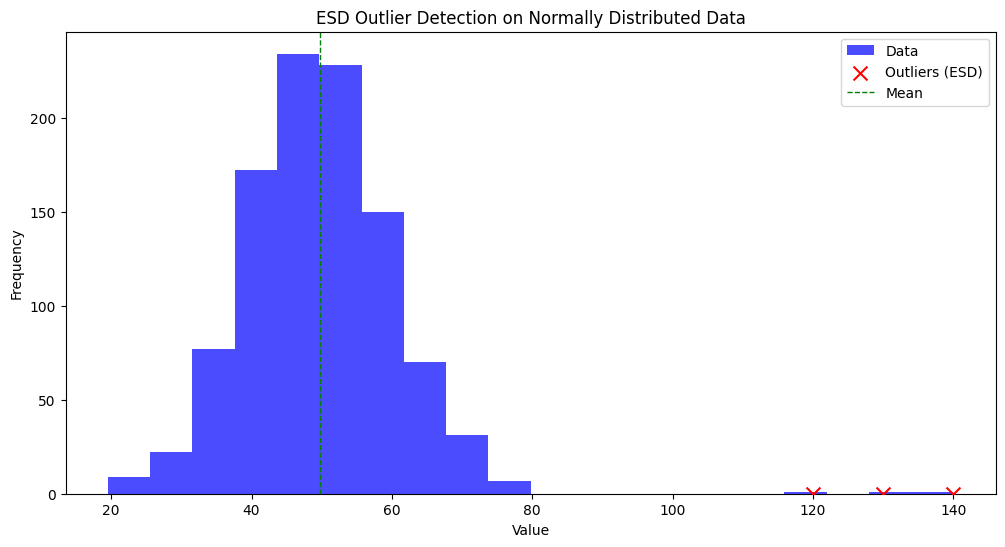

In [46]:
# @title
def esd_test(data, alpha=0.05):
    n = len(data)
    outliers = []
    for i in range(n):
        mean = np.mean(data)
        std_dev = np.std(data, ddof=1)
        max_dev = max(abs(data - mean))
        test_statistic = max_dev / std_dev
        critical_value = stats.t.ppf(1 - alpha / (2 * (n - i)), n - i - 2)
        if test_statistic > critical_value:
            outliers.append(data[np.argmax(abs(data - mean))])
            data = np.delete(data, np.argmax(abs(data - mean)))
        else:
            break
    return outliers

# ESD를 사용하여 이상치 탐지
outliers_esd = esd_test(df['Value'].values)

# 시각화
plt.figure(figsize=(12, 6))
plt.hist(df['Value'], bins=20, color='blue', alpha=0.7, label='Data')
plt.scatter(outliers_esd, np.zeros_like(outliers_esd), color='red', zorder=5, label='Outliers (ESD)', marker='x', s=100)
plt.axvline(np.mean(df['Value']), color='green', linestyle='dashed', linewidth=1, label='Mean')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('ESD Outlier Detection on Normally Distributed Data')
plt.legend()
plt.show()

## 3.2. 사분위수 상자그림을 이용한 이상치 탐지

<Figure size 1000x500 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7af8abd3fdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7af8abb74370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7af8abd3fb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7af8abb748b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7af8abb74b50>],
 'means': []}

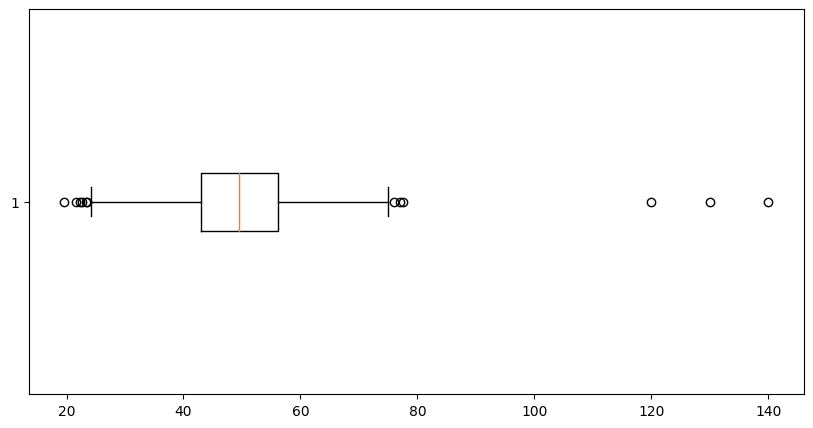

In [42]:
# @title
# 사분위수 계산
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 범위 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 탐지
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]['Value']

# 시각화
plt.figure(figsize=(10, 5))
plt.boxplot(df['Value'], vert=False)

## **이상치 확인방법(정규뷴포도와 상자그림)**

<img src = 'https://miro.medium.com/v2/resize:fit:1400/0*jBnB0iboGyU5EzVy.png'>

# <font color ='red'> **Check points**
<img src='https://blog.kakaocdn.net/dn/cRWMP9/btrS6SA5x3l/0p57ymgL9Rj9EcR2kTjlD0/img.png'>

### **단일변수(단변량) 산점도**

<Axes: xlabel='Height', ylabel='Count'>

<Axes: xlabel='Height', ylabel='Count'>

<Axes: xlabel='Height', ylabel='Count'>

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histograms of Three Variables')

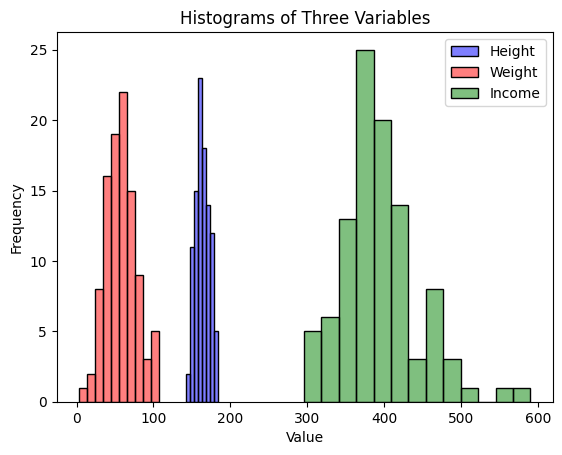

In [64]:
# prompt: 평균과 분산이 다른 100개의 관측치를 갖는 서로다른 변수 3개를 만들고 한꺼번에 hisogram을 seaborn으로 그려라

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Generate 3 variables with different means and variances
df = pd.DataFrame({
    'Height': np.random.normal(165, 10, 100),
    'Weight': np.random.normal(60, 20, 100),
    'Income': np.random.normal(400, 50, 100)
})

# Plot histograms for all variables using seaborn
sns.histplot(data=df, x='Height', color='blue', alpha=0.5, label='Height')
sns.histplot(data=df, x='Weight', color='red', alpha=0.5, label='Weight')
sns.histplot(data=df, x='Income', color='green', alpha=0.5, label='Income')

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Three Variables')
plt.legend()
plt.show()


In [67]:
df.round(1)

,Height,Weight,Income
0,158.1,52.4,380.6
1,142.9,77.1,382.6
2,169.5,17.0,565.3
3,157.4,39.3,324.5
4,178.3,62.0,410.2
...,...,...,...
95,184.5,66.6,401.7
96,170.7,51.5,360.9
97,175.7,100.2,429.9
98,160.0,78.8,374.7


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Normal Distributions with Different Means and Variances')

Text(0.5, 0, 'X')

Text(0, 0.5, 'Probability Density')

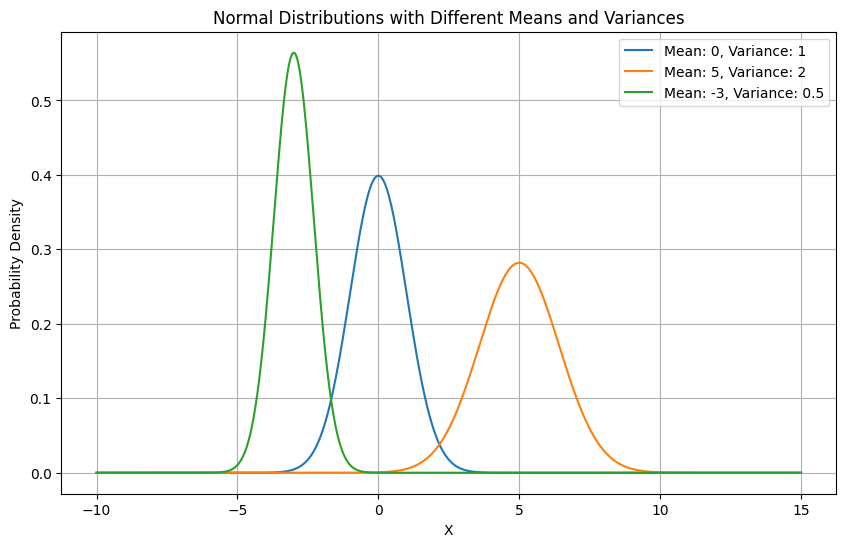

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters for the three different normal distributions
params = [
    {"mean": 0, "variance": 1},
    {"mean": 5, "variance": 2},
    {"mean": -3, "variance": 0.5}
]

# Generate data for each normal distribution
x = np.linspace(-10, 15, 1000)
distributions = [
    {"mean": param["mean"], "variance": param["variance"],
     "data": (1/np.sqrt(2 * np.pi * param["variance"])) * np.exp(-0.5 * ((x - param["mean"])**2 / param["variance"]))}
    for param in params
]

# Plot the distributions
plt.figure(figsize=(10, 6))

for dist in distributions:
    plt.plot(x, dist["data"],
             label=f"Mean: {dist['mean']}, Variance: {dist['variance']}")

plt.title("Normal Distributions with Different Means and Variances")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()
